# Genderový rozdíl v platech cělosvětově: jak to vypádá teď a jak se bude rozvijet dál?

## Pohled na data

Pro analýzu jsem využila data, které jsem našla na strankách [International labor organization](https://ilostat.ilo.org/topics/wages/). Tabulka obsahuje informaci o středních měsičních platech ve všech státech světa. Data jsou rozdelená podle pohlaví a povolání. 

<details>
<summary>Oficiální popis:</summary>
With the aim of promoting international comparability, statistics presented on ILOSTAT are based on standard international definitions wherever feasible and may differ from official national figures. This series is based on the 13th ICLS definitions. For time series comparability, it includes countries that have implemented the 19th ICLS standards, for which data are also available in the Work Statistics -- 19th ICLS (WORK) database. The earnings of employees relate to the gross remuneration in cash and in kind paid to employees, as a rule at regular intervals, for time worked or work done together with remuneration for time not worked, such as annual vacation, other type of paid leave or holidays. Earnings exclude employers' contributions in respect of their employees paid to social security and pension schemes and also the benefits received by employees under these schemes. Earnings also exclude severance and termination pay. This is a harmonized series: (1) data reported as weekly, monthly and yearly are converted to hourly using data on average weekly hours if available; and (2) data are converted to U.S. dollars as the common currency, using exchange rates or using purchasing power parity (PPP) rates for private consumption expenditures. The latter series allows for international comparisons by taking account of the differences in relative prices between countries. Data disaggregated by occupation are provided according to the latest version of the International Standard Classification of Occupations (ISCO). Data may have been regrouped from the national classifications, which may not be strictly compatible with ISCO. For more information, refer to the Wages and Working Time Statistics (COND) database description.

</details>

In [ ]:
# First of all we need to import all needed labraries
!pip install powerbiclient  # for working with power bi files in this notebook
import pandas as pd
import numpy as np
from powerbiclient import Report, models

In [85]:
# Let's open the original table and have a look on it
data_raw = pd.read_excel('average_monthly_earnings_by_sex_and_occupation_cleaned_table.xlsx')
#display(data_raw.head(15))  # in case I need to show presice amount of rows
data_raw

,Country,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,Unnamed: 8
0,Afghanistan,HIES - Households Living Conditions Survey,Total,Total,2014,8848.57,498.43,154.57,Notes\n\nAverage monthly earnings of employees...
1,Afghanistan,HIES - Households Living Conditions Survey,Total,1. Managers,2014,17310.44,975.09,302.38,Notes\n\nAverage monthly earnings of employees...
2,Afghanistan,HIES - Households Living Conditions Survey,Total,2. Professionals,2014,10508.62,591.94,183.56,Notes\n\nAverage monthly earnings of employees...
3,Afghanistan,HIES - Households Living Conditions Survey,Total,3. Technicians and associate professionals,2014,12426.72,699.99,217.07,Notes\n\nAverage monthly earnings of employees...
4,Afghanistan,HIES - Households Living Conditions Survey,Total,4. Clerical support workers,2014,15291.69,861.37,267.12,Notes\n\nAverage monthly earnings of employees...
...,...,...,...,...,...,...,...,...,...
26310,Zimbabwe,LFS - Labour Force Survey,Female,"6. Skilled agricultural, forestry and fishery ...",2021,2433.02,0.96,NaN,Notes\n\nAverage monthly earnings of employees...
26311,Zimbabwe,LFS - Labour Force Survey,Female,7. Craft and related trades workers,2021,9162.74,3.62,NaN,Notes\n\nAverage monthly earnings of employees...
26312,Zimbabwe,LFS - Labour Force Survey,Female,"8. Plant and machine operators, and assemblers",2021,26357.84,10.42,NaN,Notes\n\nAverage monthly earnings of employees...
26313,Zimbabwe,LFS - Labour Force Survey,Female,9. Elementary occupations,2021,3959.26,1.56,NaN,Notes\n\nAverage monthly earnings of employees...




---



## Jak celkově v rúzných statech vypádá wage gap za poslední leta?

Nejdřív jsem původní tabulku odfiltrovala a nechala povolání total (což je střední veličinou všech povolání) pro znazorněný obecný přehled.

*(Je to uděláno i v tomto souboru, i pomoci scriptu sort_by_occupation.py na GitHubu).*

In [86]:
sort_by_occupation = ["Total"]

data_sorted_by_occupation = data_raw[data_raw['Occupation'].isin(sort_by_occupation)]

#display(data_sorted_by_occupation.head(10))  # in case I need to show presice amount of rows

data_sorted_by_occupation

,Country,Source,Sex,Occupation,Time,Local currency,2017 PPP $,U.S. dollars,Unnamed: 8
0,Afghanistan,HIES - Households Living Conditions Survey,Total,Total,2014,8848.57,498.43,154.57,Notes\n\nAverage monthly earnings of employees...
12,Afghanistan,HIES - Households Living Conditions Survey,Male,Total,2014,9135.15,514.58,159.57,Notes\n\nAverage monthly earnings of employees...
24,Afghanistan,HIES - Households Living Conditions Survey,Female,Total,2014,5517.31,310.79,96.38,Notes\n\nAverage monthly earnings of employees...
34,Afghanistan,LFS - Labour Force Survey,Total,Total,2020,13202.24,NaN,171.87,Notes\n\nAverage monthly earnings of employees...
46,Afghanistan,LFS - Labour Force Survey,Male,Total,2020,13439.39,NaN,174.96,Notes\n\nAverage monthly earnings of employees...
...,...,...,...,...,...,...,...,...,...
26258,Zimbabwe,LFS - Labour Force Survey,Male,Total,2019,337.69,19.01,NaN,Notes\n\nAverage monthly earnings of employees...
26269,Zimbabwe,LFS - Labour Force Survey,Female,Total,2019,266.47,15.00,NaN,Notes\n\nAverage monthly earnings of employees...
26280,Zimbabwe,LFS - Labour Force Survey,Total,Total,2021,13935.05,5.51,NaN,Notes\n\nAverage monthly earnings of employees...
26292,Zimbabwe,LFS - Labour Force Survey,Male,Total,2021,13633.44,5.39,NaN,Notes\n\nAverage monthly earnings of employees...


Pro zobrazování grafů v této části jsem použila vizualizaci v Power Bi. Pro zobrazení reportu je nutné nejdřiv pustit kód dole. Tam se objeví microsoft link a kód, který je třeba napsat na lince pro autentifikaci. 

*Pak bude nutné se přihlasit do svého power bi účtu. Doufám, že všechno zafunguje, pokud ne, tento report je součásti projektu na GitHubu, nachází se ve složce reports a jmenuje se gender_wage_gap_report.pbix*

In [87]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AW6C5ZUET to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [89]:
from google.colab import output
output.enable_custom_widget_manager()

group_id="fe6a6871-8e82-4621-bb81-66df4b8196ce"
report_id="b79a9f4e-141d-4bc8-a76c-39ba0b7edc89"
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()

Pak jsem původní tabulku vyčistila tak, že jsem nechala pouze sloupečky s pohlavím (bez Total) (to dělá script *sort_male_female.py*) a ve výsledne tabulce jsem spočitala rozdíly ve mzdách v lokální měně a pak ten rozdíl jsem spočitala v procentech (pomoci scriptu *wage_gap_diff.py*) a data uložila do nové tabulky **wage_gap_worldwide.xlsx**, se které dále budu procovat.

<details>
<summary>Proč filtrování tabulky probíhá pomoci vlastního scriptu, a ne tady?</summary>
Z nejakého důvodu kód se tady provadí s chybou, proto jsem to nechala zvlášť.
</details>

<details>
<summary>Proč jsem počitala v lokální měně?</summary>
V původní tabulce ne u všech státu byli uvedeny platy v USD. A stejně pak pracuji s rozdílem v procentech, který je stejný pro lokální měny a pro USD.
</details>





---



## Jaký bude rozdíl za 10 let?



In [90]:
df = pd.read_excel('wage_gap_worldwide.xlsx')
df

,Unnamed: 0,Country,Occupation,Year,Difference in local currency,Difference in % of local currency
0,0,Afghanistan,Total,2014,3617.84,0.655725
1,1,Afghanistan,1. Managers,2014,2772.44,0.188316
2,2,Afghanistan,2. Professionals,2014,3501.94,0.450108
3,3,Afghanistan,3. Technicians and associate professionals,2014,4044.76,0.444166
4,4,Afghanistan,4. Clerical support workers,2014,2982.42,0.237619
...,...,...,...,...,...,...
8026,8026,Viet Nam,5. Service and sales workers,2015,649847.44,0.167310
8027,8027,Viet Nam,"6. Skilled agricultural, forestry and fishery ...",2015,950674.41,0.271507
8028,8028,Viet Nam,7. Craft and related trades workers,2015,507040.60,0.121819
8029,8029,Viet Nam,"8. Plant and machine operators, and assemblers",2015,754229.70,0.145036


Z tabulky **wage_gap_worldwide.xlsx** lze pak jednoduše zobrazit grafy rozdílu platu pro všechna uvedená povolání pro konkretní stát za všechna léta.

In [91]:
import plotly.express as px
df = pd.read_excel('wage_gap_worldwide.xlsx')

#df = df[df['Occupation']=='Total']  # choose an occupation we want to show stats for
df = df[df['Country'] == 'Czechia']  # choose a country we want to show stats for
df['Difference in % of local currency'] = df['Difference in % of local currency'] * 100
unique_occup = df.drop_duplicates(subset = 'Occupation')

for elem in unique_occup['Occupation']:
  tmp_df = df[df['Occupation']==elem] 
  fig = px.histogram(tmp_df, x = 'Country', y = 'Difference in % of local currency', facet_col= 'Year', text_auto = '.2f', template = 'presentation', title = elem)
  fig.update_layout(template="plotly_dark" )
  fig.show()



---



## Predikce rozdílu v platech na 10 let

### Lineární regresní analýza

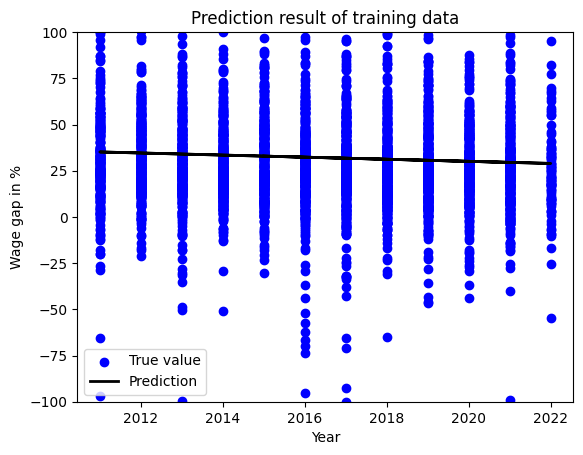

In [92]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

df = pd.read_excel('wage_gap_worldwide.xlsx')
#df = df[(df['Country'] == 'United Kingdom') | (df['Country'] == 'Czechia')]  # here I can choose countries I'll make prediction for
df = df[df['Occupation'] != 'Total'] 
df['Difference in % of local currency'] = df['Difference in % of local currency'] * 100
x = df['Year']
y = df['Difference in % of local currency']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)  # split dataframe in test and train data

# make all arrays 2-dimensional because linear_model.LinearRegression() can work only with this kind of arrays
x_train = np.array(x_train).reshape((len(x_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

x_test = np.array(x_test).reshape(len(x_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train, color='blue', label="True value")
plt.plot(x_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of training data')
plt.legend()
plt.ylim([-100, 100])
plt.show()

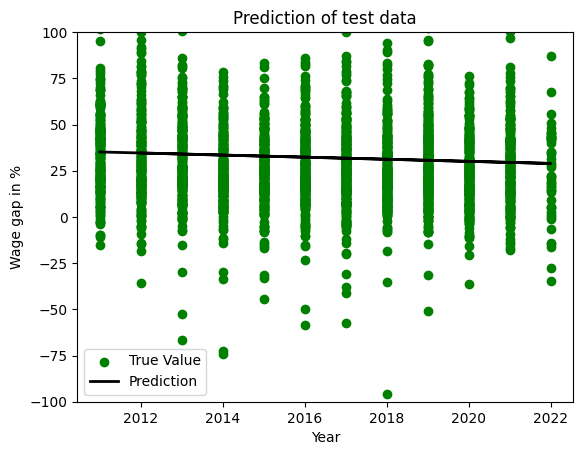

In [93]:
y_test_pred = model.predict(x_test)

plt.figure()
plt.scatter(x_test, y_test, color='green', label='True Value')
plt.plot(x_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction of test data')
plt.legend()
plt.ylim([-100, 100])
plt.show()

In [94]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 539593.6
Mean absolute error = 38
Explain variance score = -0.0
R2 score = -0.0


### Predikce na základě provedené analýzy

In [95]:
# Define the dates to make prediction for
future_dates = pd.date_range(start="2022", end="2032", freq="Y").year

# Define future indicates as 2-dimensional array
x_future_train = np.array(x_train).reshape((len(x_train),1))

y_pred = model.predict(x_future_train)  # prediction

# create df with predictions to show it
y_pred_10 = y_pred.flatten()[0:10]
predictions = pd.DataFrame({"timestamp": future_dates, "predicted_value": y_pred_10})
predictions

,timestamp,predicted_value
0,2022,32.897706
1,2023,30.074562
2,2024,28.945305
3,2025,32.897706
4,2026,29.509934
5,2027,35.156221
6,2028,31.768449
7,2029,32.897706
8,2030,31.203820
9,2031,34.026964


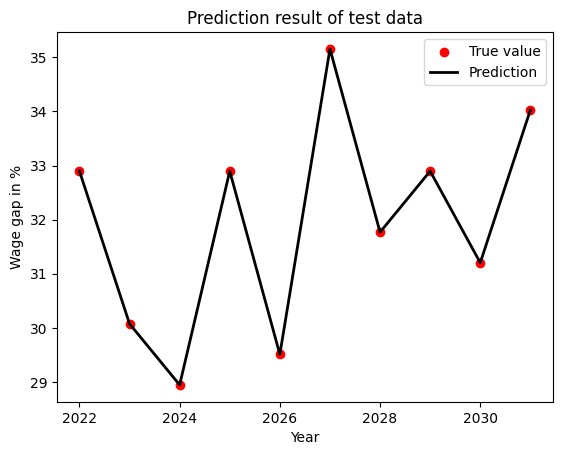

In [96]:
y_future_train = np.array(predictions['timestamp']).reshape((len(predictions['timestamp']),1))
plt.figure()
plt.scatter(predictions['timestamp'], predictions['predicted_value'], color='red', label='True value')
plt.plot(predictions['timestamp'], predictions['predicted_value'], color='black', linewidth=2, label='Prediction')

plt.xlabel("Year")
plt.ylabel("Wage gap in %")
plt.title('Prediction result of test data')
plt.legend()
plt.show()

## Závěr

Z provedené počateční analýzy je vidět, že muži ve všech státech májí větší měsiční platy a např. v Česku tzv. wage gap se točí kolem 30%.

Podle provedené predikce celosvětově se wage gap bude zmenšovat, ale zustane kolem 30%.

<details>
<summary>Na co si dát pozor při prohlížení výsledků?</summary>
Data jsou různoroda. Pro každý stát jsou uvedeny různé roky, není zahrnuté ekonomické jevy (např. inflace) – např. v reportu power bi je zajímavé, jak v Albanii v roce 2012 střední plat mužů byl 3 408 USD, ale v roce 2015 už 383 USD. 

Také bych uvedla, že si myslím, že střední platy jsou ovlivneny údalostmi (jak světovými, tak i uvnotř státu). Příkladem může být Česko – v roce 2021 celkový rozdíl se zvýšil o 10%, což může souviset s Codidovou krizi.
</details>

<details>
<summary>Dávájí výsledky predikce smysl?</summary>
Ano, ale s ohledem na upozornění v 1. otázce. Je také nutno zmínit, že při vypočitání predikce pro 1 až 2 státy z mého pohledu budou výsledky přesnější z důvodu různorodnosti dat.
</details>